### Задание 1. Сортировки

В этом задании мы сравним время выполнения двух алгоритмов сортировки: **сортировки выбором** и **быстрой сортировки**. Мы проведем вычислительные эксперименты для трех типов входных данных:
1.  Список случайных чисел.
2.  Уже отсортированный список.
3.  Список, отсортированный в обратном порядке.

Для каждого типа данных будут построены графики зависимости времени выполнения от размера списка.

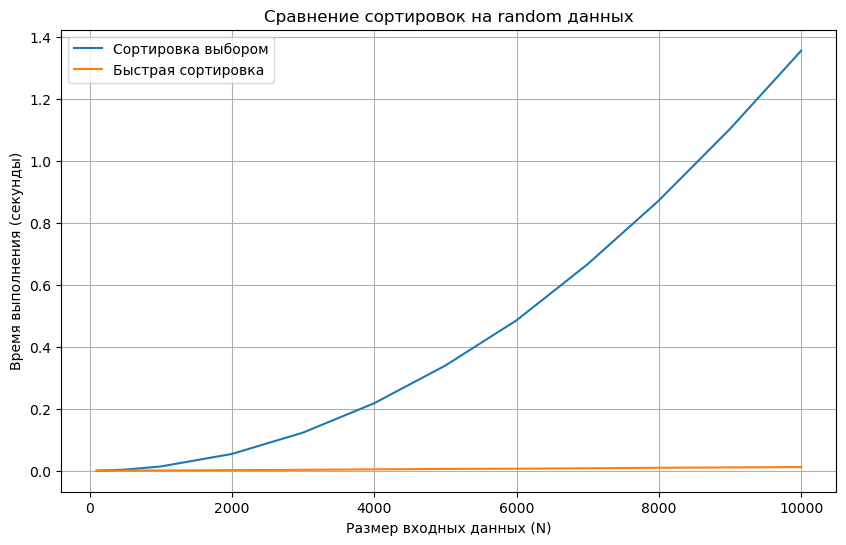

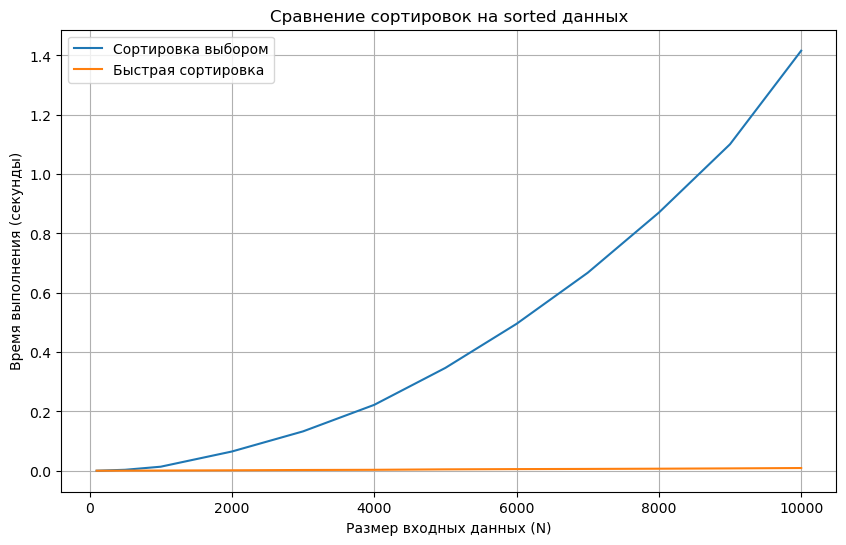

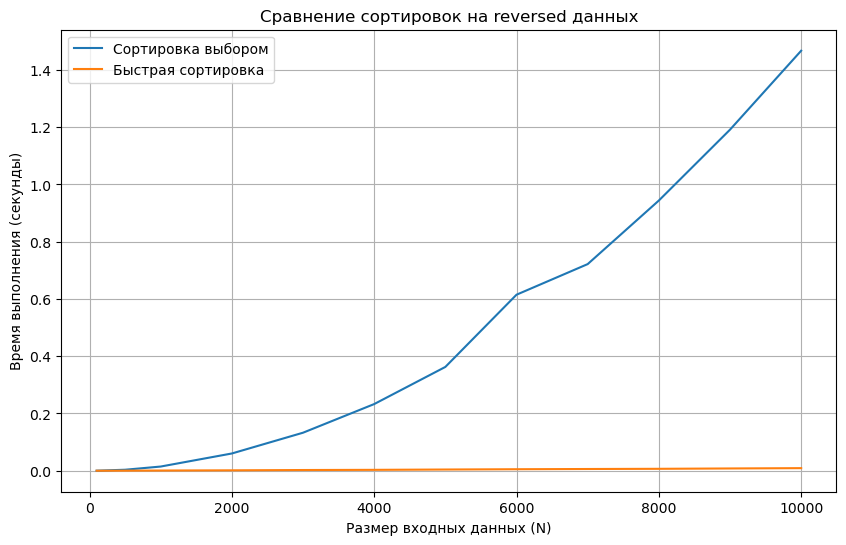

In [1]:
import time
import random
import matplotlib.pyplot as plt

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def run_experiment(sort_func, data_type, sizes):
    times = []
    for size in sizes:
        if data_type == 'random':
            data = [random.randint(0, size) for _ in range(size)]
        elif data_type == 'sorted':
            data = list(range(size))
        elif data_type == 'reversed':
            data = list(range(size, 0, -1))

        start_time = time.time()
        sort_func(data.copy())
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Размеры входных данных
sizes = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# Проведение экспериментов
data_types = ['random', 'sorted', 'reversed']
for data_type in data_types:
    selection_sort_times = run_experiment(selection_sort, data_type, sizes)
    quick_sort_times = run_experiment(quick_sort, data_type, sizes)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, selection_sort_times, label='Сортировка выбором')
    plt.plot(sizes, quick_sort_times, label='Быстрая сортировка')
    plt.xlabel('Размер входных данных (N)')
    plt.ylabel('Время выполнения (секунды)')
    plt.title(f'Сравнение сортировок на {data_type} данных')
    plt.legend()
    plt.grid(True)
    plt.show()

### Задание 2. Ряд Трибоначчи

Ряд Трибоначчи начинается с `0, 0, 1`, и каждое последующее число является суммой трех предыдущих.
Функция `tribonacci(n)` будет рекурсивно вычислять n-е число Трибоначчи.

- **Базовый случай**: Если `n=0` или `n=1`, возвращаем `0`. Если `n=2`, возвращаем `1`. Это начальные значения ряда.
- **Рекурсивный случай**: Если `n > 2`, возвращаем `tribonacci(n-1) + tribonacci(n-2) + tribonacci(n-3)`.

In [2]:
def tribonacci(n):
    if n == 0 or n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return tribonacci(n - 1) + tribonacci(n - 2) + tribonacci(n - 3)

# Примеры использования
print(f"tribonacci(0) = {tribonacci(0)}")
print(f"tribonacci(1) = {tribonacci(1)}")
print(f"tribonacci(2) = {tribonacci(2)}")
print(f"tribonacci(3) = {tribonacci(3)}")
print(f"tribonacci(4) = {tribonacci(4)}")
print(f"tribonacci(5) = {tribonacci(5)}")
print(f"tribonacci(10) = {tribonacci(10)}")

tribonacci(0) = 0
tribonacci(1) = 0
tribonacci(2) = 1
tribonacci(3) = 1
tribonacci(4) = 2
tribonacci(5) = 4
tribonacci(10) = 81


### Задание 3. Вариант 3

Для третьего варианта необходимо написать рекурсивную функцию `recursive_two(some_list)`, которая возвращает кортеж из двух значений: наибольший элемент списка и второй наибольший.

- **Базовый случай**: Если список состоит из двух элементов, возвращаем кортеж с ними, отсортированными по убыванию.
- **Рекурсивный случай**: Рекурсивно вызываем функцию для оставшейся части списка, а затем сравниваем текущий элемент с найденным наибольшим и вторым наибольшим значениями.

In [3]:
def recursive_two(some_list):
    if len(some_list) == 2:
        return (max(some_list), min(some_list))

    head, *tail = some_list
    max1, max2 = recursive_two(tail)

    if head > max1:
        return (head, max1)
    elif head > max2:
        return (max1, head)
    else:
        return (max1, max2)

# Примеры использования
my_list = [10, 5, 20, 15, 25, 30]
result = recursive_two(my_list)
print(f"В списке {my_list} наибольший элемент - {result[0]}, второй наибольший - {result[1]}")

another_list = [1, 5, 2, 8, 3]
result = recursive_two(another_list)
print(f"В списке {another_list} наибольший элемент - {result[0]}, второй наибольший - {result[1]}")

В списке [10, 5, 20, 15, 25, 30] наибольший элемент - 30, второй наибольший - 25
В списке [1, 5, 2, 8, 3] наибольший элемент - 8, второй наибольший - 5


### Задание 4. Сравнение Фибоначчи и Люка

В этом задании мы реализуем две функции для вычисления чисел Фибоначчи и Люка, а затем сравним их производительность с альтернативными рекурсивными методами.

- **Классический подход**: `fibonacci(n)` и `lucas(n)` будут использовать стандартные рекуррентные соотношения.
- **Оптимизированный подход**: `fib_with_lucas(n)` будет использовать свойство $F_n = (F_{i}+L_{j})(F_{j}+L_{i})//2$ для $i=n//2, j=n-i$.
- **Вспомогательная функция**: `lucas_with_fib(n)` будет использовать $L_n = F_{n-1} + F_{n+1}$.

Мы измерим время выполнения `fibonacci()` и `fib_with_lucas()` до `N=40` и построим график для их сравнения.

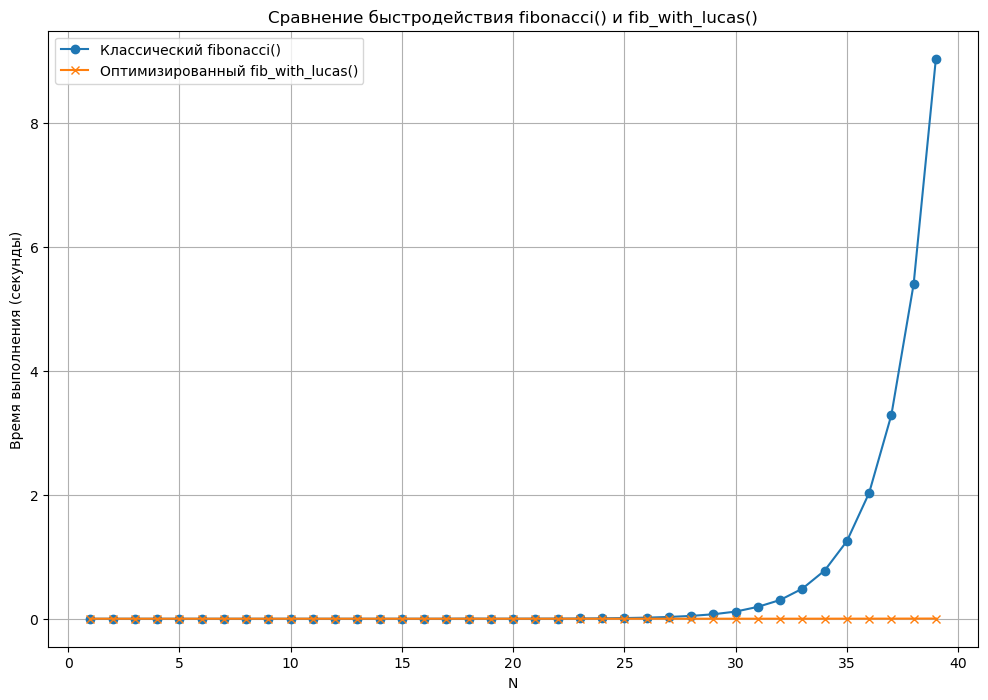

In [4]:
import time
import matplotlib.pyplot as plt

def fibonacci(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n - 1) + fibonacci(n - 2)

def lucas(n):
    if n == 0:
        return 2
    if n == 1:
        return 1
    return lucas(n - 1) + lucas(n - 2)

def lucas_with_fib(n):
    return fibonacci(n - 1) + fibonacci(n + 1)

def fib_with_lucas(n):
    if n <= 1:
        return n
    i = n // 2
    j = n - i
    fi = fibonacci(i)
    fj = fibonacci(j)
    li = lucas(i)
    lj = lucas(j)
    return (fi + lj) * (fj + li) // 2

# Проведение экспериментов и сбор данных
n_values = list(range(1, 40))
fib_times = []
fib_with_lucas_times = []

for n in n_values:
    # Замер времени для fibonacci()
    start_time = time.time()
    fibonacci(n)
    end_time = time.time()
    fib_times.append(end_time - start_time)

    # Замер времени для fib_with_lucas()
    start_time = time.time()
    fib_with_lucas(n)
    end_time = time.time()
    fib_with_lucas_times.append(end_time - start_time)

# Построение графика
plt.figure(figsize=(12, 8))
plt.plot(n_values, fib_times, label='Классический fibonacci()', marker='o')
plt.plot(n_values, fib_with_lucas_times, label='Оптимизированный fib_with_lucas()', marker='x')
plt.xlabel('N')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение быстродействия fibonacci() и fib_with_lucas()')
plt.legend()
plt.grid(True)
plt.show()

### Задание 5. Фрактальное дерево

Используя модуль `turtle`, мы будем рисовать фрактальное дерево, изменяя параметры рекурсивной функции `tree`.

Мы внесем следующие изменения:
1.  **Толщина ветвей**: Толщина будет зависеть от длины ветви.
2.  **Цвет ветвей**: Самые короткие ветви (ветви-листья) будут иметь свой цвет.
3.  **Случайный угол поворота**: Угол поворота будет случайным в заданном диапазоне (15-45 градусов).
4.  **Случайное уменьшение длины**: Длина ветви будет уменьшаться на случайное значение в заданном диапазоне.

In [ ]:
import turtle
import random

def tree(branchLen, t):
    """
    Рисует рекурсивное фрактальное дерево.
    Изменяет толщину, цвет и угол ветвей случайным образом.
    """
    if branchLen > 5:
        # 1. Изменение толщины ветвей
        t.pensize(max(1, branchLen / 15))

        t.forward(branchLen)

        # 3. Изменение угла поворота черепахи на произвольное значение
        angle_right = random.uniform(15, 45)
        angle_left = random.uniform(15, 45)

        t.right(angle_right)

        # 4. Изменение рекурсивной части, вычитая произвольное значение
        new_branch_len_1 = branchLen - random.uniform(10, 20)

        # 2. Изменение цвета ветвей
        if new_branch_len_1 <= 10:
            t.color("green")
        else:
            t.color("sienna")

        tree(new_branch_len_1, t)

        t.left(angle_right + angle_left)

        new_branch_len_2 = branchLen - random.uniform(10, 20)

        if new_branch_len_2 <= 10:
            t.color("green")
        else:
            t.color("sienna")

        tree(new_branch_len_2, t)

        t.right(angle_left)
        t.backward(branchLen)

def main():
    """
    Основная функция для настройки и запуска рисования.
    """
    myWin = turtle.Screen()
    t = turtle.Turtle()
    t.speed(0)  # Увеличиваем скорость рисования
    t.up()
    t.backward(150)
    t.left(90)
    t.down()
    t.color("sienna")

    # Рисуем дерево с начальной длиной ветви 100
    tree(100, t)

    myWin.exitonclick()

if __name__ == "__main__":
    main()

### Задание 6. Кривая Минковского (Вариант 3)

В этом задании мы нарисуем фрактал **Кривая Минковского** с помощью модуля `turtle`.

Кривая Минковского — это фрактал, который строится путем последовательной замены каждого отрезка на определенный восьмисегментный шаблон.

In [ ]:
import turtle

def minkowski(t, length, depth):
    """
    Рисует фрактал Кривая Минковского.
    """
    if depth == 0:
        t.forward(length)
    else:
        new_length = length / 4
        minkowski(t, new_length, depth - 1)
        t.left(90)
        minkowski(t, new_length, depth - 1)
        t.right(90)
        minkowski(t, new_length, depth - 1)
        t.right(90)
        minkowski(t, new_length, depth - 1)
        minkowski(t, new_length, depth - 1)
        t.left(90)
        minkowski(t, new_length, depth - 1)
        t.left(90)
        minkowski(t, new_length, depth - 1)
        t.right(90)
        minkowski(t, new_length, depth - 1)

def main():
    """
    Основная функция для настройки и запуска рисования.
    """
    t = turtle.Turtle()
    myWin = turtle.Screen()
    t.speed(0)  # Устанавливаем максимальную скорость
    t.up()
    t.goto(-200, 100)
    t.down()
    t.color("blue")

    # Рисуем Кривую Минковского с длиной 400 и глубиной 3
    minkowski(t, 400, 3)

    myWin.exitonclick()

if __name__ == "__main__":
    main()